In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
url = 'https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv'

df = pd.read_csv(url)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             44 non-null     object
 1   Total Equity     44 non-null     int64 
 2   Domestic Equity  44 non-null     int64 
 3   World Equity     44 non-null     int64 
 4   Hybrid           44 non-null     int64 
 5   Total Bond       44 non-null     int64 
 6   Taxable Bond     44 non-null     int64 
 7   Municipal Bond   44 non-null     int64 
 8   Total            44 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 3.2+ KB


In [6]:
df.describe()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,-161.727273,-1815.931818,1654.227273,684.227273,2452.613636,1931.977273,520.613636,2975.045455
std,4318.401639,3223.717184,1533.770151,670.325983,2729.245012,2574.644536,786.337321,6228.735692
min,-11156.000000,-9622.000000,-1533.000000,-1057.000000,-8193.000000,-8658.000000,-3369.000000,-9040.000000
25%,-1758.500000,-3385.750000,883.250000,249.500000,1524.500000,1089.000000,279.000000,-549.750000
50%,476.000000,-1774.000000,1563.500000,791.500000,2417.000000,1863.500000,668.000000,3948.000000
75%,1916.500000,-22.000000,2561.500000,1072.000000,3610.750000,3235.500000,855.500000,5844.500000
max,14817.000000,7995.000000,6821.000000,2888.000000,9766.000000,7311.000000,2455.000000,27471.000000


In [7]:
df.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
1,2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2,2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
3,2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
4,2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


In [8]:
freq=(pd.to_datetime(df.Date)).diff()

In [10]:
freq.value_counts()

7 days      37
21 days      2
448 days     1
56 days      1
6 days       1
43 days      1
Name: Date, dtype: int64

In [15]:
freq.median().days

7

In [16]:
print(df.index.dtype)

int64


In [17]:
df.Date=pd.to_datetime(df.Date)

In [18]:
df.set_index('Date',inplace=True)

In [19]:
df.index.dtype

dtype('<M8[ns]')

In [20]:
df.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


In [23]:
monthly=df.resample('M').sum()

In [24]:
monthly.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-31,3661,-1627,5288,2730,12149,9414,2735,18540
2013-02-28,0,0,0,0,0,0,0,0
2013-03-31,0,0,0,0,0,0,0,0
2013-04-30,0,0,0,0,0,0,0,0


In [36]:
monthly=monthly[monthly['Total Equity']!=0]
monthly.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-31,3661,-1627,5288,2730,12149,9414,2735,18540
2014-04-30,10842,1048,9794,4931,8493,7193,1300,24267
2014-05-31,-2203,-8720,6518,3172,13767,10192,3576,14736
2014-06-30,2319,-6546,8865,4588,9715,7551,2163,16621


In [37]:
year=df.resample('Y').sum()
year.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-12-31,3661,-1627,5288,2730,12149,9414,2735,18540
2014-12-31,330,-44689,45021,19570,59890,44994,14896,79787
2015-12-31,15049,-10459,25508,7280,26028,17986,8041,48357


In [38]:
df['Total Equity'].corr(df['Total Bond'])

0.2957113783444713

In [39]:
df['Total Equity'].corr(df['Total Bond'],method='spearman')

0.12276250880902043

In [41]:
df['Total Equity'].corr(df['Total Bond'], method='kendall')

0.07610993657505284

<AxesSubplot:xlabel='Total Bond', ylabel='Total Equity'>

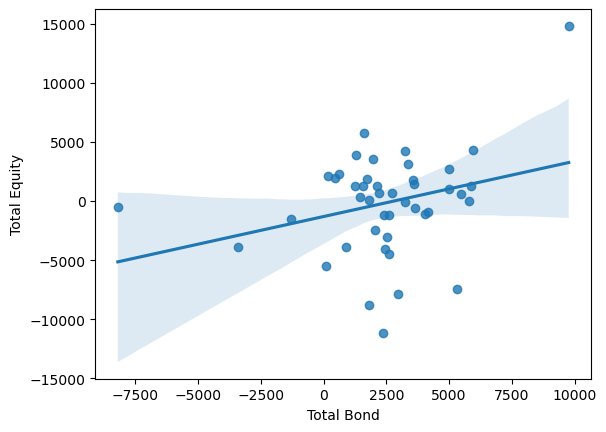

In [42]:
sns.regplot(y='Total Equity', x='Total Bond',data=df)